In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [3]:
dataset = pd.read_csv('databasefinale.csv')


In [4]:
dataset.keys()

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'xG', 'npxG', 'xA',
       'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Stagione'],
      dtype='object')

In [5]:
modeling_data= dataset.drop(['Nation', 'Squad', 'Born','Pos'], axis = 1)
modeling_data.head()

,Rk,Player,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Stagione
0,1,Mirco Antenucci,32,33,28,2571,28.6,11,4,6,...,8.7,4.9,2.1,7.0,0.30,0.07,0.38,0.17,0.240,2017-2018
1,2,Mirko Antonucci,18,2,0,31,0.3,0,1,0,...,0.5,0.5,0.2,0.7,1.50,0.71,2.21,1.50,2.212,2017-2018
2,3,Samuel Armenteros,27,9,5,429,4.8,1,0,1,...,1.1,1.1,0.0,1.1,0.23,0.00,0.23,0.23,0.232,2017-2018
3,4,Khouma Babacar,24,13,8,750,8.3,2,1,1,...,3.4,2.6,1.0,3.6,0.40,0.12,0.52,0.31,0.432,2017-2018
4,5,Andrea Belotti,23,32,29,2683,29.8,10,5,10,...,11.3,9.8,4.7,14.5,0.38,0.16,0.54,0.33,0.492,2017-2018


In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

In [20]:
orig_features = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR',
       'Gls.1', 'Ast.1', 'G+A', 'G-PK.1', 'G+A-PK', 'npxG', 'xA',
       'npxG+xA', 'xG.1', 'xA.1', 'xG+xA', 'npxG.1', 'npxG+xA.1', 'Stagione']

In [21]:

x_data = dataset[orig_features].to_numpy()
y_data = dataset[['xG']].to_numpy()

In [22]:
# check for missing values in all the columns
modeling_data.isnull().sum()

Rk           0
Player       0
Age          0
MP           0
Starts       0
Min          0
90s          0
Gls          0
Ast          0
G-PK         0
PK           0
PKatt        0
CrdY         0
CrdR         0
Gls.1        0
Ast.1        0
G+A          0
G-PK.1       0
G+A-PK       0
xG           0
npxG         0
xA           0
npxG+xA      0
xG.1         0
xA.1         0
xG+xA        0
npxG.1       0
npxG+xA.1    0
Stagione     0
dtype: int64

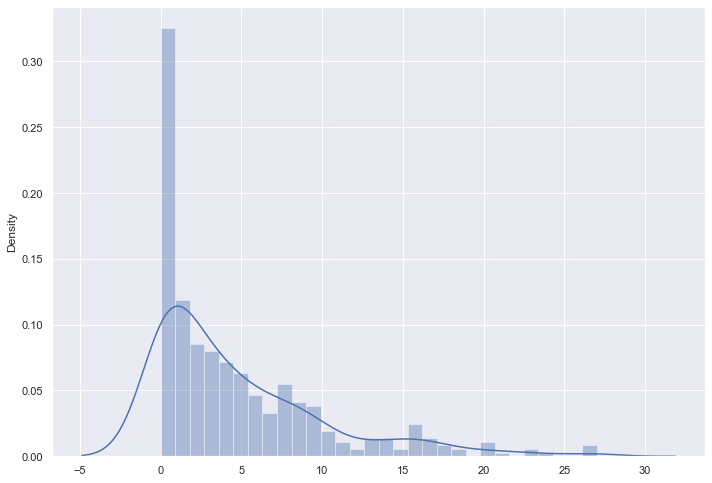

In [23]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(y_data, bins=30)
plt.show()

In [24]:
# compute the pair wise correlation for all columns  
correlation_matrix = modeling_data.corr().round(2)

<AxesSubplot:>

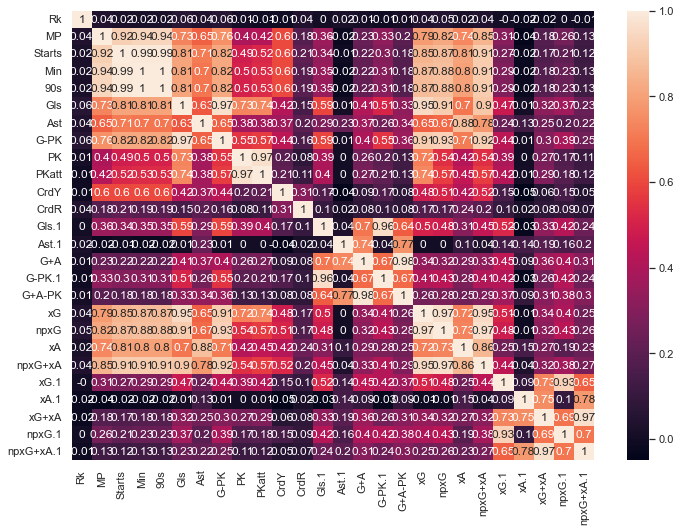

In [25]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
features = ['Rk', 'MP', 'Starts', 'Min', 'Gls', 'G-PK', 'PKatt', 'npxG', 'xA', 'npxG+xA']

x_data = dataset[features].to_numpy()
y_data = dataset[['xG']].to_numpy()

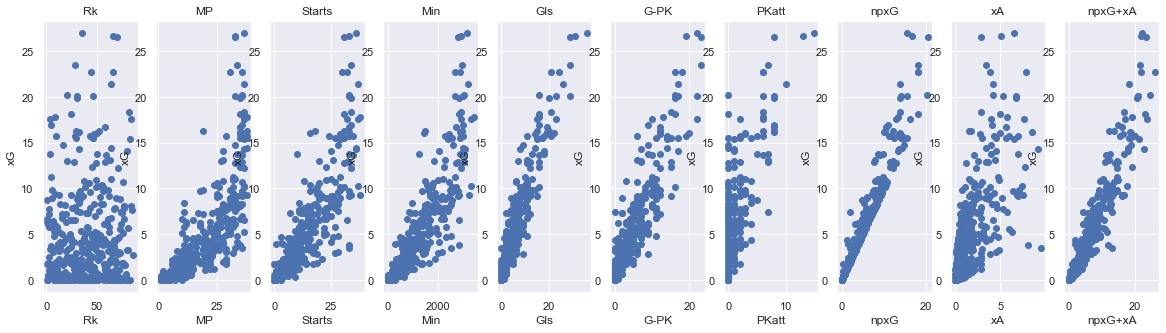

In [28]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = modeling_data[col]
    y = y_data
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('xG')